# MAE 598: Design Optimization - Homework 4

## Problem 1

**Objective function**

$$ 
\begin{aligned}
\quad & \min_{x_{1}, x_{2}} \quad f(x) = (x_{1} + 1)^2 +  (x_{2} - 2)^2 \\
\quad & s.t. \\
\quad & g_1(x) = x_{1} - 2 \le 0 \\
\quad & g_2(x) = x_{2} - 1 \le 0 \\
\quad & g_3(x) = - x_{1} \le 0 \\
\quad & g_4(x) = - x_{2} \le 0
\end{aligned}
$$

___

Solving the problem graphically, we see that the optimal solution is $ x = [0, 1] $


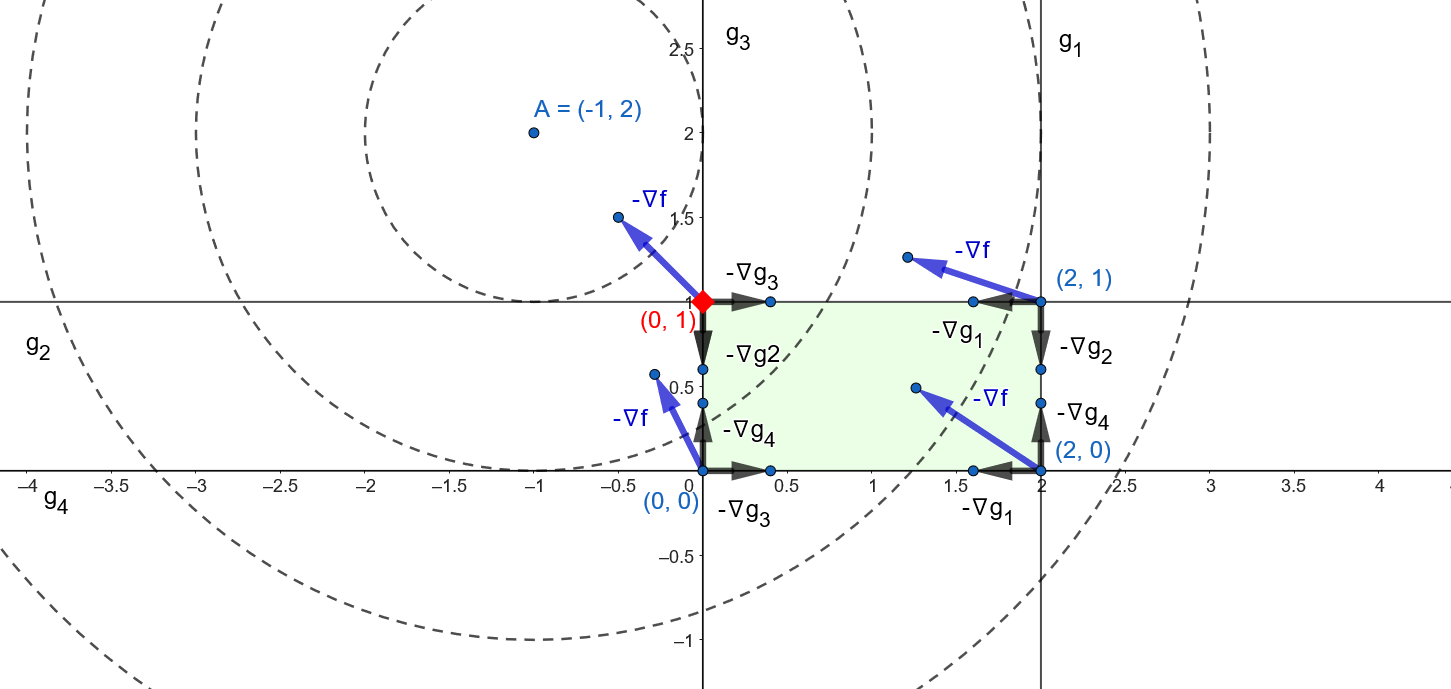


Shaded region represents the feasible solution space. Red diamond represents the optimal solution. The lengths of the arrows are not to scale.

Formulate the Lagrangian

$$ \mathcal{L} = (x_{1} + 1)^2 +  (x_{2} - 2)^2 + \mu_1 (x_{1} - 2) + \mu_2 (x_{2} - 1) + \mu_3 (- x_{1}) + \mu_4 (- x_{2}) $$


$${
\nabla_x \mathcal{L} 
=
\begin{bmatrix}
2 \ (x_{1} + 1) - \mu_3 + \mu_1 \\
2 \ (x_{2} - 2) - \mu_4 + \mu_2 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$


$${
\nabla_x f 
=
\begin{bmatrix}
2 \ (x_{1} + 1) \\
2 \ (x_{2} - 2)
\end{bmatrix}
}$$


$${
\nabla_x g_1 
=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
}$$


$${
\nabla_x g_2
=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
}$$


$${
\nabla_x g_3
=
\begin{bmatrix}
-1 \\
0
\end{bmatrix}
}$$


$${
\nabla_x g_4
=
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
}$$

___

At point $ x_1 = 0, x_2 = 1 $, $ g_2 $ and $ g_3 $ are active. Therefore, $ \mu_1 = 0, \mu_2 > 0, \mu_3 > 0, \mu_4 = 0 $.

$${
\nabla_x \mathcal{L} |_{(0, 1)}
=
\begin{bmatrix}
2 \ - \mu_3 \\
- 2 \ + \mu_2 
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_2 = 2 \\
\mu_3 = 2
$$

Since both Lagrange multipliers are positive, the KKT conditions are satisfied. From the graphical solution, it is apparent that the problem is strictly convex. Therefore th point $ x = [0, 1] $ represents the optimal solution.


Verifying KKT conditions at the other corners of the feasible space:

At point $ x_1 = 0, x_2 = 0 $, $ g_3 $ and $ g_4 $ are active. Therefore, $ \mu_1 = 0, \mu_2 = 0, \mu_3 > 0, \mu_4 > 0 $.

$${
\nabla_x \mathcal{L} |_{(0, 0)}
=
\begin{bmatrix}
2 \ - \mu_3 \\
- 4 \ + \mu_4 
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_3 = 2 \\
\mu_4 = -4
$$

$ \mu_4 $ is negative, therefore the KKT condition is not satisfied.



At point $ x_1 = 2, x_2 = 1 $, $ g_1 $ and $ g_2 $ are active. Therefore, $ \mu_1 > 0, \mu_2 > 0, \mu_3 = 0, \mu_4 = 0 $.



$${
\nabla_x \mathcal{L} |_{(2, 1)}
=
\begin{bmatrix}
4 \ + \mu_1 \\
- 2 \ + \mu_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_1 = -6 \\
\mu_2 = 2
$$

$ \mu_1 $ is negative, therefore the KKT condition is not satisfied.



At point $ x_1 = 2, x_2 = 0 $, $ g_1 $ and $ g_4 $ are active. Therefore, $ \mu_1 > 0, \mu_2 = 0, \mu_3 = 0, \mu_4 > 0 $.

$${
\nabla_x \mathcal{L} |_{(2, 0)}
=
\begin{bmatrix}
6 \ + \mu_1 \\
- 4 \ - \mu_4
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_1 = -6 \\
\mu_4 = -4
$$

$ \mu_1 $ and $ \mu_4 $ is negative, therefore the KKT condition is not satisfied.


## Problem 2

**Objective function**

$$ 
\begin{aligned}
\quad & \min_{x_{1}} \quad f(x) = - x_{1} \\
\quad & s.t. \\
\quad & g_1(x) = x_{2} + (1 - x_{1})^3 \le 0 \\
\quad & g_2(x) = - x_{2} \le 0
\end{aligned}
$$

___


Solving the problem graphically, we see that the optimal solution is $ x = [1, 0] $

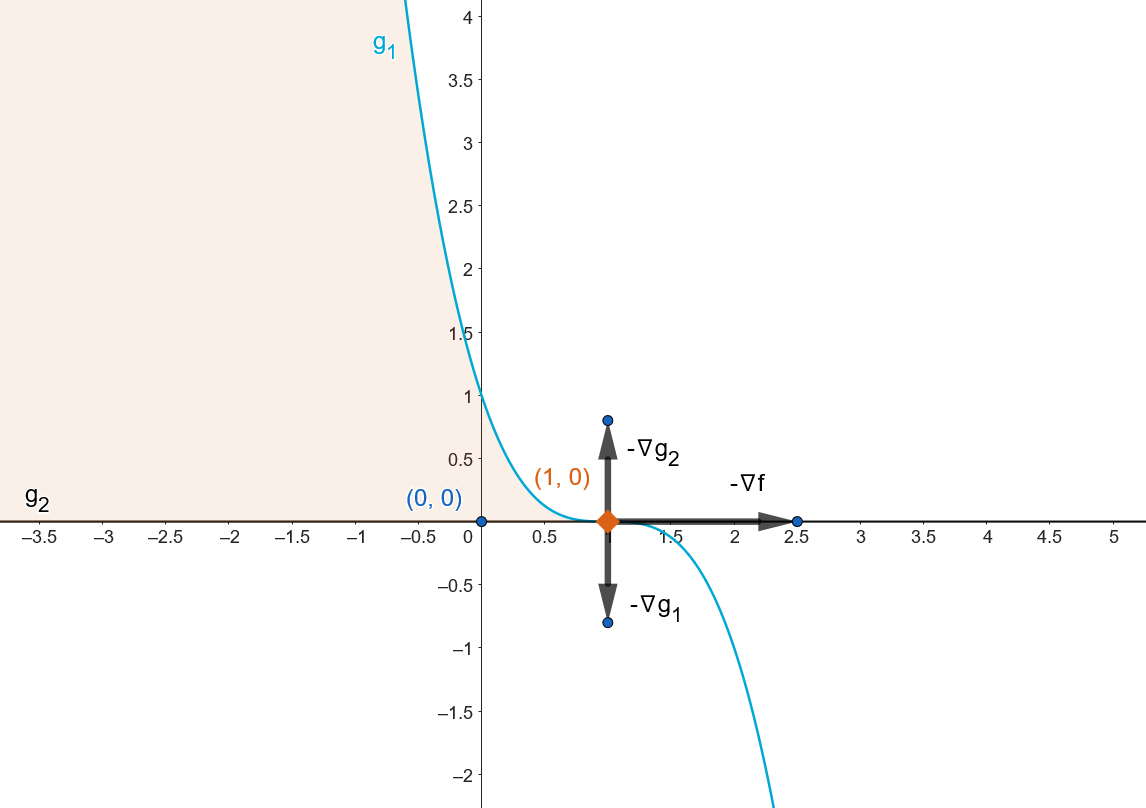

Shaded region represents the feasible solution space. Red diamond represents the optimal solution. The lengths of the arrows are not to scale.

Formulate the Lagrangian

$$ \mathcal{L} = - x_{1} + \mu_1 (x_{2} + (1 - x_{1})^3) + \mu_2 (- x_{2}) $$


$${
\nabla_x \mathcal{L} 
=
\begin{bmatrix}
- 1 + 3 \ \mu_1 \ (1 - x_{1})^2 \\
\mu_1 - \mu_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$${
\nabla_x f 
=
\begin{bmatrix}
-1 \\
0
\end{bmatrix}
}$$

$${
\nabla_x g_1 
=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
}$$

$${
\nabla_x g_2
=
\begin{bmatrix}
0 \\
-1
\end{bmatrix}
}$$


___

When $ g_1 $ and $ g_2 $ are active, the point is $ x_1 = 1, x_2 = 0 $, and Lagrange multipliers are $ \mu_1 > 0, \mu_2 > 0 $.

$${
\nabla_x \mathcal{L} |_{(1, 0)}
=
\begin{bmatrix}
-1 \\
\mu_1 - \mu_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

This condition is not satisfied since we get an incorrect result $ -1 = 0 $



When $ g_1 $ and $ g_2 $ are inactive, the Lagrange multipliers are $ \mu_1 = 0, \mu_2 = 0 $.

$${
\nabla_x \mathcal{L}
=
\begin{bmatrix}
-1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

This condition is not satisfied since we get an incorrect result $ -1 = 0 $




When $ g_1 $ is active and $ g_2 $ is inactive, the Lagrange multipliers are $ \mu_1 > 0, \mu_2 = 0 $

$${
\nabla_x \mathcal{L}
=
\begin{bmatrix}
-1 \\
\mu_1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_2 = \mu_3 = 0
$$

This condition is not satisfied since $ \mu_1 $ should be positive, but we get $ \mu_1 = 0 $.





When $ g_1 $ is inactive and $ g_2 $ is active, the Lagrange multipliers are $ \mu_1 = 0, \mu_2 > 0 $.

$${
\nabla_x \mathcal{L}
=
\begin{bmatrix}
-1 \\
- \mu_2
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0
\end{bmatrix}
}$$

$$
\mu_2 = \mu_3 = 0
$$

This condition is not satisfied since $ \mu_2 $ should be positive, but we get $ \mu_2 = 0 $.


None of the KKT conditions are satisfied, because $ \nabla g_1 $ and $ \nabla g_2 $ are linearly dependant. This problem cannot be solved using KKT conditions because the optima is not regular.

___


## Problem 3

To maximize the given objective function, we formulate a minimization problem for the negative of the given function.

**Objective function**

$$ \min_{x_{1}, x_{2}, x_{3}} \quad f(x) = - x_{1} x_{2} - x_{2} x_{3} - x_{1} x_{3} $$

$$ s.t. \quad h(x) = x_{1} + x_{2} + x_{3} - 3 = 0 $$

___

Formulate the Lagrangian

$$ \mathcal{L} = - x_{1} x_{2} - x_{2} x_{3} - x_{1} x_{3} + \lambda_1 (x_{1} + x_{2} + x_{3} - 3) $$


$${
\nabla_x \mathcal{L} 
=
\begin{bmatrix}
- x_2 - x_3 + \lambda_1 \\
- x_1 - x_3 + \lambda_1 \\
- x_2 - x_1 + \lambda_1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
}$$

$${
\nabla_\lambda \mathcal{L} 
=
x_{1} + x_{2} + x_{3} - 3 = 0
}$$

Solving the four euqations above, we get:

$${ 
x_{1} = x_{2} = x_{3}  = 1 \\
\lambda = 2
}$$


Computing the Hessian of the Lagrangian

$$
\mathcal{L} _{xx}
=
\displaystyle
\begin{bmatrix}
0 & - 1 & - 1 \\
-1 & 0 & -1 \\
-1 & -1 & 0 
\end{bmatrix}
$$
___

Checking Second Order sufficient conditions


$$
d_x^T \ \mathcal{L} _{xx} \ d_x
=
\begin{bmatrix}
dx_1 & dx_2 & dx_3
\end{bmatrix}
\quad
\begin{bmatrix}
0 & - 1 & - 1 \\
-1 & 0 & -1 \\
-1 & -1 & 0 
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
- 2 dx_{1} dx_{2} - 2 dx_{2} dx_{3} - 2 dx_{1} dx_{3}
\\
$$



$$
\\
\frac{\partial{h}}{\partial{x}} dx = 0
\\
\begin{bmatrix}
\frac{\partial{h}}{\partial{x_1}} & \frac{\partial{h}}{\partial{x_2}} & \frac{\partial{h}}{\partial{x_3}}
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 & 1 & 1
\end{bmatrix}
\quad
\begin{bmatrix}
dx_1 \\
dx_2 \\
dx_3
\end{bmatrix}
\quad
=
\quad
0
$$



$$
dx_1 + dx_2 + dx_3 = 0
\\
dx_1 = - dx_2 - dx_3
$$

Substituting this result into the first condition, we get:


$$
d_x^T \ \mathcal{L} _{xx} \ d_x
\quad
=
\quad
- 2 \ (- dx_2 - dx_3) \ dx_{2} - 2 \ dx_{2} \ dx_{3} - 2 \ (- dx_2 - dx_3) \ dx_{3}
\quad
=
\quad
- 2 \ (- dx_2^2 - dx_{2} dx_{3} - dx_{2} dx_{3} - dx_{3}^2 + dx_{2} dx_{3})
\quad
=
\quad
2 \ dx_2^2 + 2 \ dx_{3}^2 + 2 \ dx_{2} dx_{3}
\\
$$


$$
d_x^T \ \mathcal{L} _{xx} \ d_x
\quad
=
\quad
2 \ \Big[(dx_{2} + \frac{dx_{3}}{2})^2 + \frac{3 \ dx_{3}^2}{4}\Big] \ge 0
\\
$$


If $ dx_{2} = 0 $ and $ dx_{3} = 0 $, then from the second condition $ dx_{1} = 0 $ as well. This does not produce a valid perturbation.


$$
\therefore
d_x^T \ \mathcal{L} _{xx} \ d_x
=
2 \ \Big[(dx_{2} + \frac{dx_{3}}{2})^2 + \frac{3 \ dx_{3}^2}{4}\Big] > 0
\\
$$
when $ dx $ is feasible.

The solution $ x = [1, 1, 1] $ is an optimal solution.

___

## Problem 4

Objective function

$$ \min_{x_{1}, x_{2}, x_{3}} \quad f(x) = x_{1}^2 + x_{2}^2 + x_{3}^2 $$

$$ 
\begin{aligned}
\quad & s.t. \\
\quad & h_1(x) = \frac{x_{1}}{4} + \frac{x_{2}}{5} + \frac{x_{3}}{25} - 1 = 0
\\
\quad & h_2(x) = x_{1} + x_{2} - x_{3} = 0
\end{aligned}
$$



The problem is solved using a **Pytorch** based implementation of *Generalized Reduced Gradient* with *Levenberg Marquardt* solver.


Decision variable, $ d = [x_1] $

State variables, $ s = [x_2, x_3] $


___

In [1]:
# Import libraries
import torch as t
import numpy as np
from matplotlib import pyplot as plt

import torch.nn as nn
from torch.autograd import Variable
from torch.autograd.functional import jacobian

In [93]:
# Part 1
"""
Decision variable: x0
State variables: x1, x2
"""

m = 2 # No. of constraints
n = 3 # No. of variables
d = n - m # No. of decision variables


def f(x):
    # Define the objective function
    f = lambda x: x[0] ** 2 + x[1] ** 2 + x[2] ** 2
    # Define the constraints
    h1 = lambda x: ((x[0] ** 2) / 4) + ((x[1] ** 2) / 5) + ((x[2] ** 2) / 25) - 1
    h2 = lambda x: x[0] + x[1] - x[2]
    
    return f(x), h1(x), h2(x)

# Reduced Gradient (Analytically computed)
dfdd_analytical = lambda x: ((-5 * x[0] * x[2]) + (-21 * x[0] * x[2]) + (16 * x[1] * x[2])) / (10 * x[1] + 2 * x[2])

In [3]:
# Compute Jacobian
def jac(x, n=n):
    J = t.zeros((n, n))
    for i in range(n):
       J[i] =  jacobian(f, (x))[i] # 'jacobian' function in Pytorch returns a tuple of tensors. Copying each tensor slice into a new tensor for the ease of indexing.
    return J

# Evaluate Constraints
def hFunc(x, m=m, n=n):
    H = t.zeros((m, 1))
    for i in range(m):
        H[i] =  f(x)[d + i]
    return H

# Part 3
# Calculate the Reduced gradient from the jacobian
dfdd = lambda J: J[0,0] - J[0,1:] @ t.pinverse(J[1:,1:]) @ J[1:,0]

In [5]:
# Levenberg Marquardt solver
def LMSolve(x, m=m, n=n, epochs=60, Lambda=1.):      
    for i in range(epochs):
        H = hFunc(x)
        J =  jac(x)
        delta = t.pinverse(J[d:, d:].T @ J[d:, d:] + Lambda * t.eye(m)) @ J[d:, d:].T @ H # Change quantity in s_k
        with t.no_grad():
            x[d:] = x[d:] - delta.T # Update s_k
    return x


# Update point X
def updateX(x, alpha):
    xn = t.zeros(3)
    J = jac(x)
    xn[0] = x[0] - alpha * dfdd(J)
    xn[1:] = x[1:] + (alpha * t.pinverse(J[1:,1:]) @ J[1:,0].reshape(2,-1) *  dfdd(J)).T[0]
    return xn


# Armijo Line search
def lineSearch(x, t0=0.5, K=25):
    alpha = 1
    i = 0
    
    func = f(updateX(x, alpha))[0]
    phi = f(x)[0] - (t0 * alpha * dfdd(jac(x)) ** 2)
    
    while func > phi and i < K:
        alpha = 0.5 * alpha
        func = f(updateX(x, alpha))[0]
        phi = f(x)[0] - (t0 * alpha * dfdd(jac(x)) ** 2)

        i += 1
    return alpha

In [62]:
# Part 4
# Initialization
def GRG(x):
    # Initialize variables
    e = t.norm(dfdd(jac(x)))
    tol = 1e-3 # Error threshold

    xSol = x.detach().numpy()
    fVal = [f(x)[0].item()]
    alphaSol = [1]
    eVal = [e]

    k = 0
    while e > tol:
        # Part 4.1
        # Inexact line search
        alpha = lineSearch(x)

        # Part 4.2 and 4.3
        J = jac(x)
        
        # Update the point      
        with t.no_grad():
            x = updateX(x, alpha)
        
        # Part 4.4
        # LM Solver
        x = LMSolve(x)

        # Part 4.5
        e = t.norm(dfdd(jac(x)))
        # Store important information in every iteration
        xSol = np.vstack((xSol, x.detach().numpy())) # Record x values in each iteration
        fVal.append(f(x)[0].item()) # Record f values in each iteration
        alphaSol.append(alpha) # Record alpha values in each iteration
        eVal.append(e)

        k += 1
        print (f"Iteration: {k:<5} Alpha: {alpha:<10} x: {str(x.detach().numpy()) :<40} f(x): {fVal[k]:<20} Error: {e:<20}")
    return xSol, fVal, alphaSol, eVal


Feasible starting point:  tensor([0.1000, 2.0217, 2.1217], dtype=torch.float64, requires_grad=True)

GRG

Iteration: 1     Alpha: 0.25       x: [-0.54557415  2.04420139  1.49862724]    f(x): 6.722294098143511    Error: 3.0616188049316406  
Iteration: 2     Alpha: 0.125      x: [-0.9282765   1.92936347  1.00108697]    f(x): 5.5863157917200255   Error: 2.7880258560180664  
Iteration: 3     Alpha: 0.125      x: [-1.27677974  1.71018273  0.43340305]    f(x): 4.742729666089317    Error: 1.9143002033233643  
Iteration: 4     Alpha: 0.0625     x: [-1.3964235   1.59823557  0.20181213]    f(x): 4.545083659483026    Error: 1.3571269512176514  
Iteration: 5     Alpha: 0.0625     x: [-1.48124393  1.50243396  0.02119016]    f(x): 4.451840411348006    Error: 0.8160951137542725  
Iteration: 6     Alpha: 0.0625     x: [-1.53224988  1.4364645  -0.09578523]    f(x): 4.420394752787838    Error: 0.40369129180908203 
Iteration: 7     Alpha: 0.03125    x: [-1.54486523  1.41900361 -0.1258616 ]    f(x): 4.416

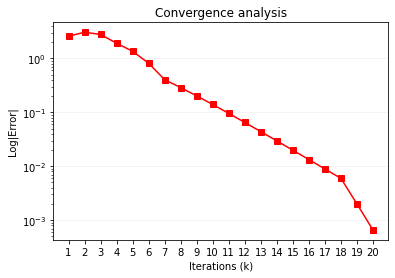

In [101]:
# Part 2
# Find the feasible point based on the initial gues of decision variables
x = t.tensor([0.1, 1., 1.], dtype=t.float64, requires_grad=True)
x = LMSolve(x)
print('Feasible starting point: ', x)
# print('Reduced gradient:', dfdd(jac(x)))
# print('Analytical calculation\n', dfdd_analytical(x))

# Find the optimal solution using GRG
print("\nGRG\n")
xSol, fVal, alphaSol, eVal = GRG(x)
print('\nThe optimal solution is x = ', xSol[-1, :])
# Convergence analysis

# Plot results
print("\nConvergence plot\n")
plt.semilogy(range(1, len(fVal)+1), eVal, "rs-")
# plt.xlim(1, 50)
plt.xticks(ticks=range(1, len(fVal)+1), labels=range(1, len(fVal)+1))
plt.xlabel("Iterations (k)")
plt.ylabel("Log|Error|")
plt.title("Convergence analysis")
plt.grid(axis='y', color='0.95')
plt.show()


The error in the solution steadily converges to zero, thus giving the optimal solution.

___

## Problem 5

#### **Given:**

$ C_{ij} $ = Cost of moving from node $ i $ to $ j $ 

#### **Given:**

$ X_{ij} $ = Event of moving from node $ i $ to $ j $

$$
X_{ij} = \begin{cases} 
1 \quad i \to j \\
0 \quad i \not{\to} j
\end{cases}
$$



$$
C_{ij} = \begin{cases} 
c_{ij} \quad i \to j \\
\infty \quad i \not{\to} j
\end{cases}
$$

There are $ N $ nodes to be visited by the garbage truck and the start/end node is labelled as $ 0 $. 
The indices are in range:

$ i, j $ = 0 to N


The garbage truck has to visit every single node and return to the starting position.

Consider this random graph of nodes.  The connections represent possible routes the truck can take to travel between the nodes. The connections between nodes are not consistent. The connection configurations can be one-to-one, many-to-one, one-to-many etc. This is done to model a general navigation scenario for the garbage truck. In a simplified version of the graph, every node will have one incoming and one outgoing connection to two nearest distinct nodes respectively.


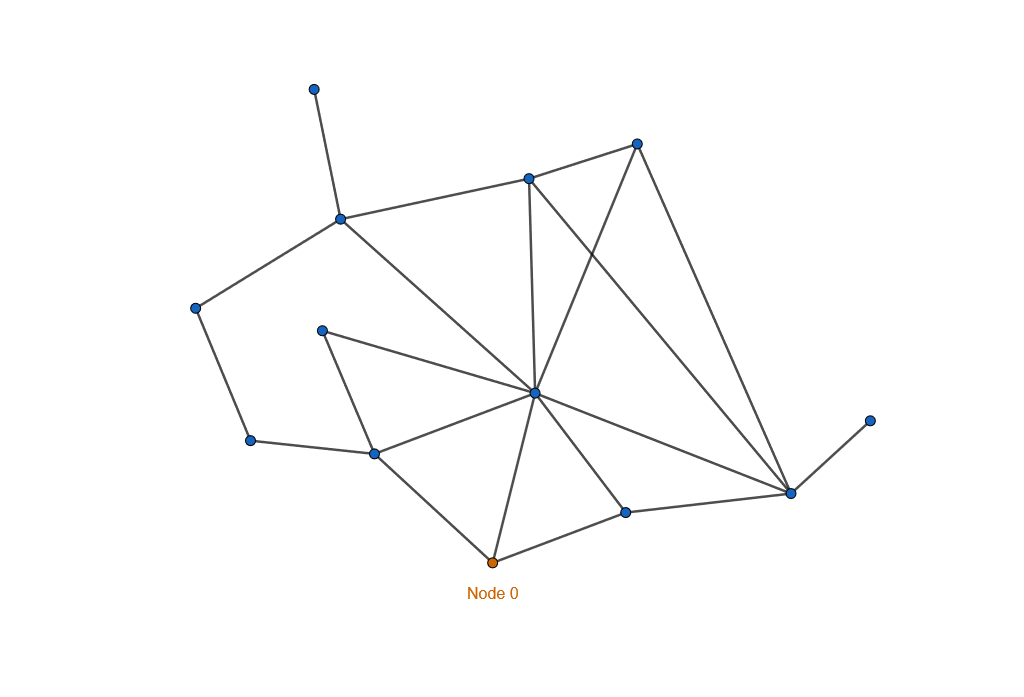


**The objective function is:**

$$ {\min_{X_{ij}} \quad  \displaystyle \sum_{i, j=0}^{N} X_{ij} C_{ij}} $$

The constraints can be defined as follows:

Since the truck has to start and end the trip at node 0, the constraint on $ X_{ij} $ is,

Forward movement

$ \displaystyle \sum_{i, j=0}^{N} X_{0, j} = 1 $

Return movement

$ \displaystyle \sum_{i, j=0}^{N} X_{j, 0} = 1 $

The truck has to visit all $ N $ nodes at least once. So, the sum of all the movements should add up to $ N $, when each node is visited exactly once or greater than $ N $ when some of the nodes may be visited more than once.

The constraint can be written as:

$ \displaystyle \sum_{i, j=0}^{N} X_{i, j} \ge N $

In case every node is connected to more than one neighbouring node, the entry and exit routes to the node can be distinct. In this case, it might be possible to complete the route by visiting every single node, exactly once. However, if some of the outer nodes have a single connection only, then the neighbouring node is visited more than once. Thus the incoming and outgoing traffic at a node is equal.


The constraint can be written as:

$ \displaystyle \sum_{i, j=0}^{N} X_{i, j} = \sum_{i, j=0}^{N} X_{j, i} $


___

Now, the problem can be formulated as:


$$
\begin{aligned}
\quad & {\min_{X_{ij}} \quad  \displaystyle \sum_{i, j=0}^{N} X_{ij} C_{ij}} \\
\quad & s.t. \\
\quad & \displaystyle \sum_{i, j=0}^{N} X_{0, j} = 1 \\
\quad & \displaystyle \sum_{i, j=0}^{N} X_{j, 0} = 1 \\
\quad & \displaystyle \sum_{i, j=0}^{N} X_{i, j} \ge N \\
\quad & \displaystyle \sum_{i, j=0}^{N} X_{i, j} = \sum_{i, j=0}^{N} X_{j, i}\\
\quad & ~\forall i, j=0,...,N
\end{aligned}
$$